In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_ausio2 = np.load('dataset_TipAu_SiO2.npz')['vDeflection_N']

print(data_ausio2.max())
print(data_ausio2.min())

1.3395403e-09
-5.635834e-09


Generating random curve.

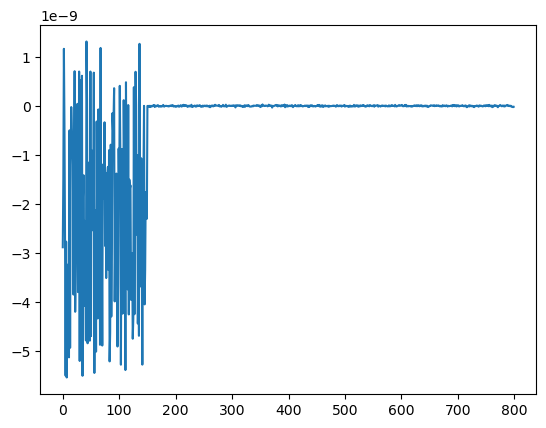

In [3]:
random = np.random.uniform(low=data_ausio2.max(), high=data_ausio2.min(), size=(np.random.randint(100, 200),))
zeros = np.zeros((800 - random.shape[0])) + + np.random.normal(0, 1, size=(800 - random.shape[0])) * 1e-11
curve = np.concatenate([random, zeros])

plt.plot(curve)
plt.show()

Saving images.

In [4]:
try:
    wavelets_ausio2 = np.load('rd_tipAu_SiO2_morl.npz')['wavelets']

except:
    scales = np.arange(1, 128)
    wavelet = pywt.ContinuousWavelet('morl')
    
    num_idx = 1024
    wavelets = []
    
    for idx in range(num_idx):
        random = np.random.uniform(low=data_ausio2.max(), high=data_ausio2.min(), size=(np.random.randint(100, 200),))
        zeros = np.zeros((800 - random.shape[0])) + + np.random.normal(0, 1, size=(800 - random.shape[0])) * 1e-11
        curve = np.concatenate([random, zeros])
        coef, freqs = pywt.cwt(curve, scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('rd_tipAu_SiO2_morl.npz', wavelets=wavelets)
    print('Saved.')

Saved.
